In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

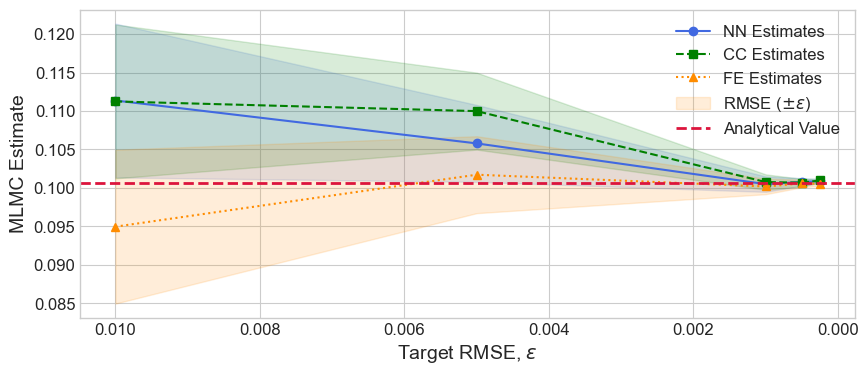

In [213]:
true_value = lambda n: (1 - np.exp(- 2 * n**2 * np.pi**2 * 0.25)) / (n**2 * np.pi**2)
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_fourier_mode_var.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_fe.csv")

df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_fourier_mode_var.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_fe.csv")


plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df_nn['eps'], df_nn['mlmc_estimate'], 'o-', label='NN Estimates', color='royalblue')
ax.fill_between(df_nn['eps'], 
                df_nn['mlmc_estimate'] - df_nn['eps'], 
                df_nn['mlmc_estimate'] + df_nn['eps'], 
                color='royalblue', alpha=0.15)

ax.plot(df_cc['eps'], df_cc['mlmc_estimate'], 's--', label='CC Estimates', color='green')
ax.fill_between(df_cc['eps'], 
                df_cc['mlmc_estimate'] - df_cc['eps'], 
                df_cc['mlmc_estimate'] + df_cc['eps'], 
                color='green', alpha=0.15)

ax.plot(df_fe['eps'], df_fe['mlmc_estimate'], '^:', label='FE Estimates', color='darkorange')
ax.fill_between(df_fe['eps'], 
                df_fe['mlmc_estimate'] - df_fe['eps'], 
                df_fe['mlmc_estimate'] + df_fe['eps'], 
                color='darkorange', alpha=0.15, label=r'RMSE ($\pm \varepsilon$)')

ax.axhline(y=true_value(1), linestyle='--', color='crimson', linewidth=2, label='Analytical Value')

ax.invert_xaxis()
ax.set_xlabel(r'Target RMSE, $\varepsilon$', fontsize=14)
ax.set_ylabel('MLMC Estimate', fontsize=14)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('report/graphics/she_sq_amp_conv.png', dpi=300,
            bbox_inches='tight')

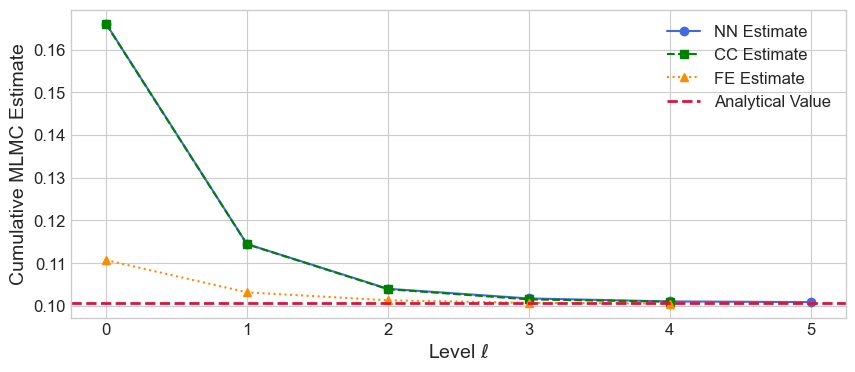

In [214]:
true_value = lambda n: (1 - np.exp(- 2 * n**2 * np.pi**2 * 0.25)) / (n**2 * np.pi**2)
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_fourier_mode_var.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_fe.csv")

df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_fourier_mode_var.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_fe.csv")


plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 4))

# Nearest Neighbours (NN)
Yl_nn = df_nn[df_nn.columns[df_nn.columns.str.startswith("Yl_")]].iloc[0].values
Nl_nn = df_nn[df_nn.columns[df_nn.columns.str.startswith("Nl_")]].iloc[0].values
Vl_nn = df_nn[df_nn.columns[df_nn.columns.str.startswith("Vl_")]].iloc[0].values
est_nn = np.cumsum(Yl_nn)
se_nn = np.sqrt(np.cumsum(Vl_nn / Nl_nn))
levels_nn = np.arange(len(est_nn))
ax.plot(levels_nn, est_nn, 'o-', label='NN Estimate', color='royalblue')

# Central Coupling (CC)
Yl_cc = df_cc[df_cc.columns[df_cc.columns.str.startswith("Yl_")]].iloc[0].values
Nl_cc = df_cc[df_cc.columns[df_cc.columns.str.startswith("Nl_")]].iloc[0].values
Vl_cc = df_cc[df_cc.columns[df_cc.columns.str.startswith("Vl_")]].iloc[0].values
est_cc = np.cumsum(Yl_cc)
levels_cc = np.arange(len(est_cc))
ax.plot(levels_cc, est_cc, 's--', label='CC Estimate', color='green')

# Finite Element (FE)
Yl_fe = df_fe[df_fe.columns[df_fe.columns.str.startswith("Yl_")]].iloc[0].values
Nl_fe = df_fe[df_fe.columns[df_fe.columns.str.startswith("Nl_")]].iloc[0].values
Vl_fe = df_fe[df_fe.columns[df_fe.columns.str.startswith("Vl_")]].iloc[0].values
est_fe = np.cumsum(Yl_fe)
levels_fe = np.arange(len(est_fe))
ax.plot(levels_fe, est_fe, '^:', label='FE Estimate', color='darkorange')

# Plot the true value
ax.axhline(y=true_value(1), linestyle='--', color='crimson', linewidth=2, label='Analytical Value')

# Set labels, title, and legend
ax.set_xlabel(r'Level $\ell$', fontsize=14)
ax.set_ylabel('Cumulative MLMC Estimate', fontsize=14)
ax.legend(fontsize=12)

# Improve tick parameters and set integer ticks for levels
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.savefig('report/graphics/she_sq_amp_cumconv.png', dpi=300,
            bbox_inches='tight')

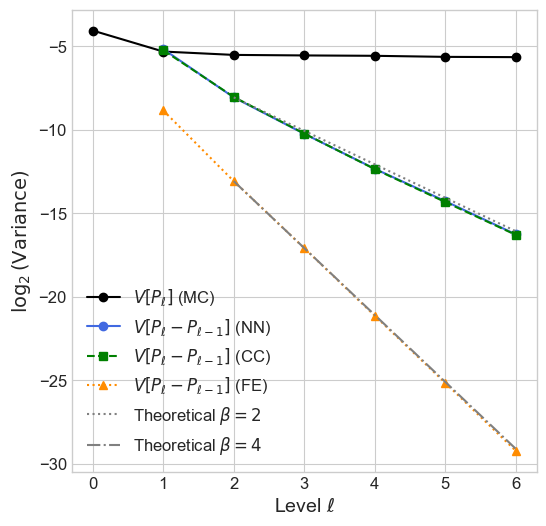

In [224]:
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_fourier_mode_var_cc.csv")
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_fourier_mode_var.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_fourier_mode_var_fe.csv")

df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_convergence_stoch_heat_eqn_fourier_mode_var.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_convergence_stoch_heat_eqn_fourier_mode_var_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_convergence_stoch_heat_eqn_fourier_mode_var_fe.csv")


plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(6, 6))

levels = df_cc['level'].values
var_mc = df_cc['var_Pf'].values
var_mlmc_nn = df_nn['var_Pf-Pc'].values
var_mlmc_cc = df_cc['var_Pf-Pc'].values
var_mlmc_fe = df_fe['var_Pf-Pc'].values

ax.plot(levels, np.log2(var_mc), 'ko-', label=r'$V[P_\ell]$ (MC)')
ax.plot(levels[1:], np.log2(var_mlmc_nn[1:]), 'o-', label=r'$V[P_\ell - P_{\ell-1}]$ (NN)', color='royalblue')
ax.plot(levels[1:], np.log2(var_mlmc_cc[1:]), 's--', label=r'$V[P_\ell - P_{\ell-1}]$ (CC)', color='green')
ax.plot(levels[1:], np.log2(var_mlmc_fe[1:]), '^:', label=r'$V[P_\ell - P_{\ell-1}]$ (FE)', color='darkorange')

# Add theoretical decay lines for reference
l_theory = levels[2:]

# beta=2
beta2_theory = np.log2(var_mlmc_nn[2]) - 2.0 * (l_theory - l_theory[0])
ax.plot(l_theory, beta2_theory, ':', color='grey', label=r'Theoretical $\beta=2$')

# beta = 4
beta4_theory = np.log2(var_mlmc_fe[2]) - 4.0 * (l_theory - l_theory[0])
ax.plot(l_theory, beta4_theory, '-.', color='grey', label=r'Theoretical $\beta=4$')

ax.set_xlabel(r'Level $\ell$', fontsize=14)
ax.set_ylabel(r'$\log_2(\text{Variance})$', fontsize=14)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.savefig('report/graphics/she_sq_amp_var_decay.png', dpi=300,
            bbox_inches='tight')

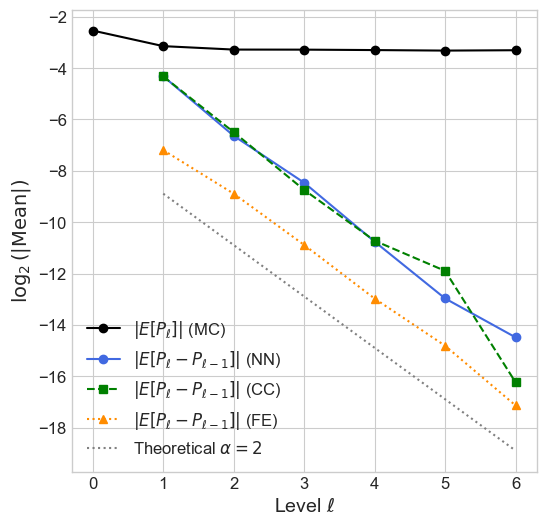

In [215]:
# df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_fourier_mode_var_cc.csv")
# df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_fourier_mode_var.csv")
# df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_fourier_mode_var_fe.csv")

df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_convergence_stoch_heat_eqn_fourier_mode_var.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_convergence_stoch_heat_eqn_fourier_mode_var_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_convergence_stoch_heat_eqn_fourier_mode_var_fe.csv")


levels = df_cc['level'].values
ave_mc = df_cc['ave_Pf'].values
ave_mlmc_nn = df_nn['ave_Pf-Pc'].values
ave_mlmc_cc = df_cc['ave_Pf-Pc'].values
ave_mlmc_fe = df_fe['ave_Pf-Pc'].values

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(levels, np.log2(np.abs(ave_mc)), 'ko-', label=r'$|E[P_\ell]|$ (MC)')
ax.plot(levels[1:], np.log2(np.abs(ave_mlmc_nn[1:])), 'o-', label=r'$|E[P_\ell - P_{\ell-1}]|$ (NN)', color='royalblue')
ax.plot(levels[1:], np.log2(np.abs(ave_mlmc_cc[1:])), 's--', label=r'$|E[P_\ell - P_{\ell-1}]|$ (CC)', color='green')
ax.plot(levels[1:], np.log2(np.abs(ave_mlmc_fe[1:])), '^:', label=r'$|E[P_\ell - P_{\ell-1}]|$ (FE)', color='darkorange')

l_theory = levels[1:]
alpha2_theory = np.log2(np.abs(ave_mlmc_fe[2])) - 2.0 * (l_theory - l_theory[0])
ax.plot(l_theory, alpha2_theory, ':', color='grey', label=r'Theoretical $\alpha=2$')

ax.set_xlabel(r'Level $\ell$', fontsize=14)
ax.set_ylabel(r'$\log_2(|\text{Mean}|)$', fontsize=14)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.savefig('report/graphics/she_sq_amp_err_decay.png', dpi=300,
            bbox_inches='tight')

plt.show()

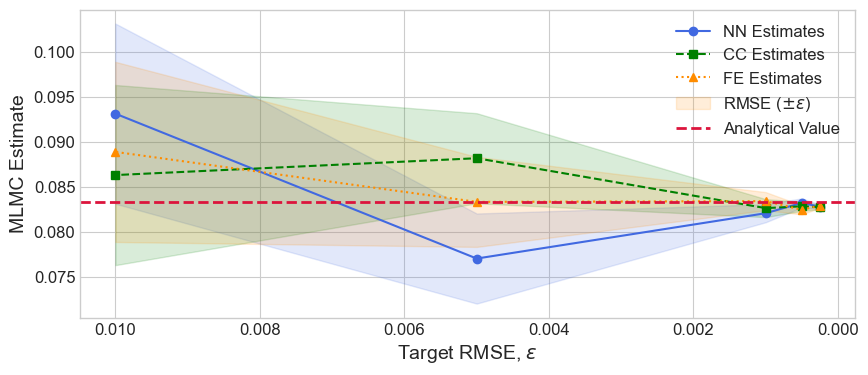

In [216]:
true_value = 1 / 12
# df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_nn.csv")
# df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_cc.csv")
# df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_fe.csv")

df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_energy_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_energy_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_energy_fe.csv")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df_nn['eps'], df_nn['mlmc_estimate'], 'o-', label='NN Estimates', color='royalblue')
ax.fill_between(df_nn['eps'], 
                df_nn['mlmc_estimate'] - df_nn['eps'], 
                df_nn['mlmc_estimate'] + df_nn['eps'], 
                color='royalblue', alpha=0.15)

ax.plot(df_cc['eps'], df_cc['mlmc_estimate'], 's--', label='CC Estimates', color='green')
ax.fill_between(df_cc['eps'],
                df_cc['mlmc_estimate'] - df_cc['eps'],
                df_cc['mlmc_estimate'] + df_cc['eps'],
                color='green', alpha=0.15)

ax.plot(df_fe['eps'], df_fe['mlmc_estimate'], '^:', label='FE Estimates', color='darkorange')
ax.fill_between(df_fe['eps'], 
                df_fe['mlmc_estimate'] - df_fe['eps'], 
                df_fe['mlmc_estimate'] + df_fe['eps'], 
                color='darkorange', alpha=0.15, label=r'RMSE ($\pm \varepsilon$)')

ax.axhline(y=true_value, linestyle='--', color='crimson', linewidth=2, label='Analytical Value')

ax.invert_xaxis()
ax.set_xlabel(r'Target RMSE, $\varepsilon$', fontsize=14)
ax.set_ylabel('MLMC Estimate', fontsize=14)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('report/graphics/she_energy_conv.png', dpi=300,
            bbox_inches='tight')

/var/folders/l5/rhh7z5c528b5hjwqy30m3vzr0000gn/T/ipykernel_1988/3479696003.py:18: RuntimeWarning: invalid value encountered in divide
  se_nn = np.sqrt(np.cumsum(Vl_nn / Nl_nn))


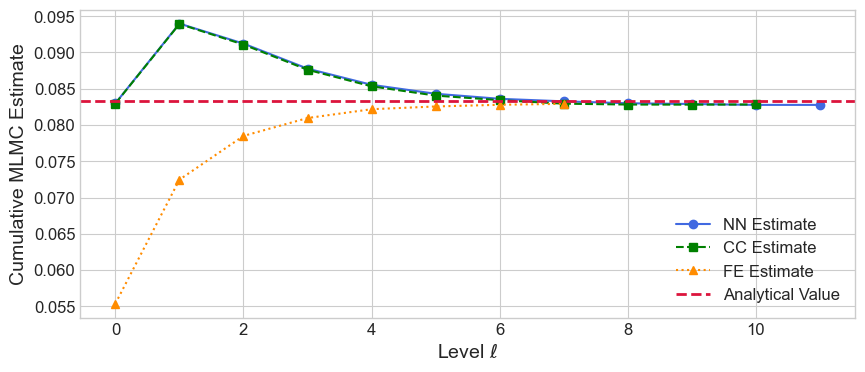

In [217]:
true_value = 1 / 12
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_fe.csv")

df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_energy_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_energy_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_energy_fe.csv")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 4))

# Nearest Neighbours (NN)
Yl_nn = df_nn[df_nn.columns[df_nn.columns.str.startswith("Yl_")]].iloc[0].values
Nl_nn = df_nn[df_nn.columns[df_nn.columns.str.startswith("Nl_")]].iloc[0].values
Vl_nn = df_nn[df_nn.columns[df_nn.columns.str.startswith("Vl_")]].iloc[0].values
est_nn = np.cumsum(Yl_nn)
se_nn = np.sqrt(np.cumsum(Vl_nn / Nl_nn))
levels_nn = np.arange(len(est_nn))
ax.plot(levels_nn, est_nn, 'o-', label='NN Estimate', color='royalblue')

# Central Coupling (CC)
Yl_cc = df_cc[df_cc.columns[df_cc.columns.str.startswith("Yl_")]].iloc[1].values
Nl_cc = df_cc[df_cc.columns[df_cc.columns.str.startswith("Nl_")]].iloc[1].values
Vl_cc = df_cc[df_cc.columns[df_cc.columns.str.startswith("Vl_")]].iloc[1].values
est_cc = np.cumsum(Yl_cc)
levels_cc = np.arange(len(est_cc))
ax.plot(levels_cc, est_cc, 's--', label='CC Estimate', color='green')

# Finite Element (FE)
Yl_fe = df_fe[df_fe.columns[df_fe.columns.str.startswith("Yl_")]].iloc[0].values
Nl_fe = df_fe[df_fe.columns[df_fe.columns.str.startswith("Nl_")]].iloc[0].values
Vl_fe = df_fe[df_fe.columns[df_fe.columns.str.startswith("Vl_")]].iloc[0].values
est_fe = np.cumsum(Yl_fe)
levels_fe = np.arange(len(est_fe))
ax.plot(levels_fe, est_fe, '^:', label='FE Estimate', color='darkorange')

# Plot the true value
ax.axhline(y=true_value, linestyle='--', color='crimson', linewidth=2, label='Analytical Value')

# Set labels, title, and legend
ax.set_xlabel(r'Level $\ell$', fontsize=14)
ax.set_ylabel('Cumulative MLMC Estimate', fontsize=14)
ax.legend(fontsize=12)

# Improve tick parameters and set integer ticks for levels
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.savefig('report/graphics/she_energy_cumconv.png', dpi=300,
            bbox_inches='tight')

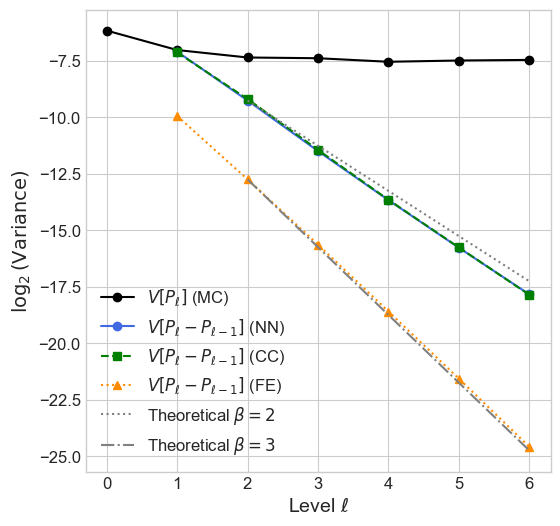

In [218]:
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_energy_cc.csv")
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_energy_nn.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_energy_fe.csv")

df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_convergence_stoch_heat_eqn_energy_cc.csv")
df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_convergence_stoch_heat_eqn_energy_nn.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_convergence_stoch_heat_eqn_energy_fe.csv")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(6, 6))

levels = df_cc['level'].values
var_mc = df_cc['var_Pf'].values
var_mlmc_nn = df_nn['var_Pf-Pc'].values
var_mlmc_cc = df_cc['var_Pf-Pc'].values
var_mlmc_fe = df_fe['var_Pf-Pc'].values

ax.plot(levels, np.log2(var_mc), 'ko-', label=r'$V[P_\ell]$ (MC)')
ax.plot(levels[1:], np.log2(var_mlmc_nn[1:]), 'o-', label=r'$V[P_\ell - P_{\ell-1}]$ (NN)', color='royalblue')
ax.plot(levels[1:], np.log2(var_mlmc_cc[1:]), 's--', label=r'$V[P_\ell - P_{\ell-1}]$ (CC)', color='green')
ax.plot(levels[1:], np.log2(var_mlmc_fe[1:]), '^:', label=r'$V[P_\ell - P_{\ell-1}]$ (FE)', color='darkorange')

# Add theoretical decay lines for reference
l_theory = levels[2:]

# beta=2
beta2_theory = np.log2(var_mlmc_nn[2]) - 2.0 * (l_theory - l_theory[0])
ax.plot(l_theory, beta2_theory, ':', color='grey', label=r'Theoretical $\beta=2$')

# beta = 4
beta4_theory = np.log2(var_mlmc_fe[2]) - 3.0 * (l_theory - l_theory[0])
ax.plot(l_theory, beta4_theory, '-.', color='grey', label=r'Theoretical $\beta=3$')

ax.set_xlabel(r'Level $\ell$', fontsize=14)
ax.set_ylabel(r'$\log_2(\text{Variance})$', fontsize=14)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.savefig('report/graphics/she_energy_var_decay.png', dpi=300,
            bbox_inches='tight')

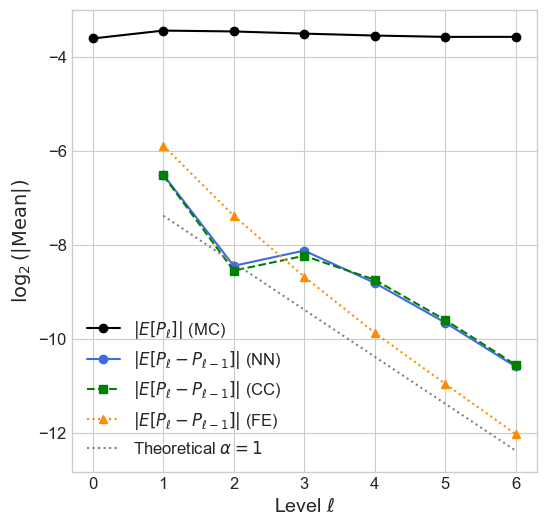

In [219]:
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_energy_cc.csv")
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_energy_nn.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_convergence_stoch_heat_eqn_energy_fe.csv")

df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_convergence_stoch_heat_eqn_energy_cc.csv")
df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_convergence_stoch_heat_eqn_energy_nn.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_convergence_stoch_heat_eqn_energy_fe.csv")

levels = df_cc['level'].values
ave_mc = df_cc['ave_Pf'].values
ave_mlmc_nn = df_nn['ave_Pf-Pc'].values
ave_mlmc_cc = df_cc['ave_Pf-Pc'].values
ave_mlmc_fe = df_fe['ave_Pf-Pc'].values

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(levels, np.log2(np.abs(ave_mc)), 'ko-', label=r'$|E[P_\ell]|$ (MC)')
ax.plot(levels[1:], np.log2(np.abs(ave_mlmc_nn[1:])), 'o-', label=r'$|E[P_\ell - P_{\ell-1}]|$ (NN)', color='royalblue')
ax.plot(levels[1:], np.log2(np.abs(ave_mlmc_cc[1:])), 's--', label=r'$|E[P_\ell - P_{\ell-1}]|$ (CC)', color='green')
ax.plot(levels[1:], np.log2(np.abs(ave_mlmc_fe[1:])), '^:', label=r'$|E[P_\ell - P_{\ell-1}]|$ (FE)', color='darkorange')

l_theory = levels[1:]
alpha2_theory = np.log2(np.abs(ave_mlmc_fe[2])) -1.0 * (l_theory - l_theory[0])
ax.plot(l_theory, alpha2_theory, ':', color='grey', label=r'Theoretical $\alpha=1$')

ax.set_xlabel(r'Level $\ell$', fontsize=14)
ax.set_ylabel(r'$\log_2(|\text{Mean}|)$', fontsize=14)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.savefig('report/graphics/she_energy_err_decay.png', dpi=300,
            bbox_inches='tight')

plt.show()

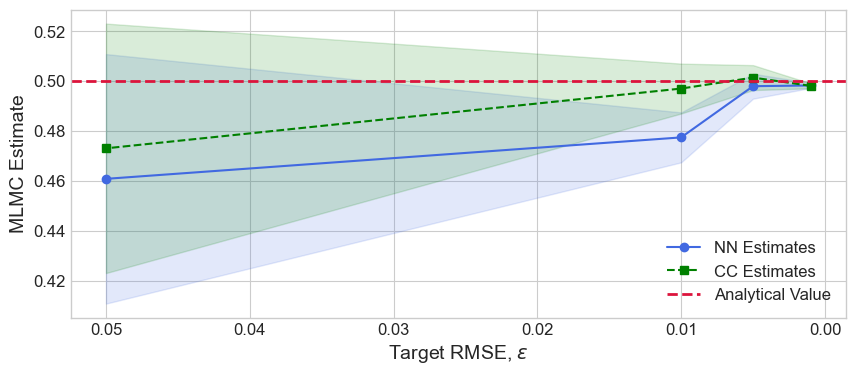

In [220]:
true_value = 0.5
# df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_dk_nn.csv")
# df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_dk_cc.csv")

df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_2/mlmc_complexity_dk_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_2/mlmc_complexity_dk_cc.csv")


plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df_nn['eps'], df_nn['mlmc_estimate'], 'o-', label='NN Estimates', color='royalblue')
ax.fill_between(df_nn['eps'], 
                df_nn['mlmc_estimate'] - df_nn['eps'], 
                df_nn['mlmc_estimate'] + df_nn['eps'], 
                color='royalblue', alpha=0.15)

ax.plot(df_cc['eps'], df_cc['mlmc_estimate'], 's--', label='CC Estimates', color='green')
ax.fill_between(df_cc['eps'], 
                df_cc['mlmc_estimate'] - df_cc['eps'], 
                df_cc['mlmc_estimate'] + df_cc['eps'], 
                color='green', alpha=0.15)

ax.axhline(y=true_value, linestyle='--', color='crimson', linewidth=2, label='Analytical Value')

ax.invert_xaxis()
ax.set_xlabel(r'Target RMSE, $\varepsilon$', fontsize=14)
ax.set_ylabel('MLMC Estimate', fontsize=14)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('report/graphics/dk_conv.png', dpi=300,
            bbox_inches='tight')

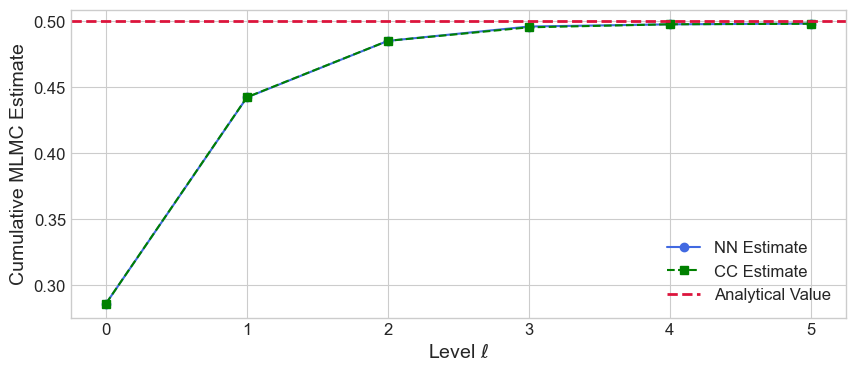

In [221]:
true_value = 0.5
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_dk_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_dk_cc.csv")

df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_2/mlmc_complexity_dk_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_2/mlmc_complexity_dk_cc.csv")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 4))

# Nearest Neighbours (NN)
Yl_nn = df_nn[df_nn.columns[df_nn.columns.str.startswith("Yl_")]].iloc[0].values
Nl_nn = df_nn[df_nn.columns[df_nn.columns.str.startswith("Nl_")]].iloc[0].values
Vl_nn = df_nn[df_nn.columns[df_nn.columns.str.startswith("Vl_")]].iloc[0].values
est_nn = np.cumsum(Yl_nn)
se_nn = np.sqrt(np.cumsum(Vl_nn / Nl_nn))
levels_nn = np.arange(len(est_nn))
ax.plot(levels_nn, est_nn, 'o-', label='NN Estimate', color='royalblue')

# Central Coupling (CC)
Yl_cc = df_cc[df_cc.columns[df_cc.columns.str.startswith("Yl_")]].iloc[0].values
Nl_cc = df_cc[df_cc.columns[df_cc.columns.str.startswith("Nl_")]].iloc[0].values
Vl_cc = df_cc[df_cc.columns[df_cc.columns.str.startswith("Vl_")]].iloc[0].values
est_cc = np.cumsum(Yl_cc)
levels_cc = np.arange(len(est_cc))
ax.plot(levels_cc, est_cc, 's--', label='CC Estimate', color='green')

# Plot the true value
ax.axhline(y=true_value, linestyle='--', color='crimson', linewidth=2, label='Analytical Value')

# Set labels, title, and legend
ax.set_xlabel(r'Level $\ell$', fontsize=14)
ax.set_ylabel('Cumulative MLMC Estimate', fontsize=14)
ax.legend(fontsize=12)

# Improve tick parameters and set integer ticks for levels
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.savefig('report/graphics/dk_cumconv.png', dpi=300,
            bbox_inches='tight')

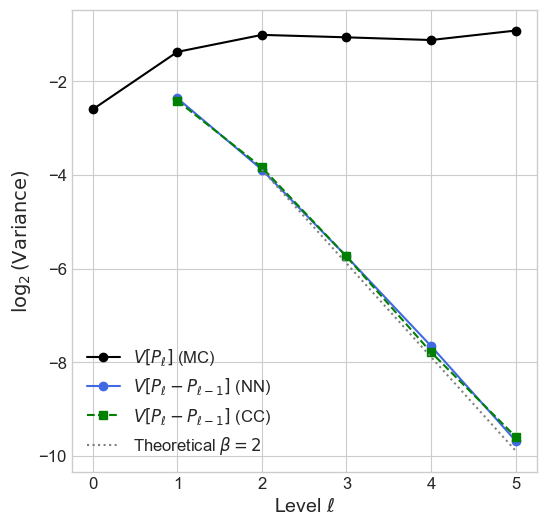

In [222]:
df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_2/mlmc_convergence_dk_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_2/mlmc_convergence_dk_cc.csv")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(6, 6))

levels = df_cc['level'].values
var_mc = df_cc['var_Pf'].values
var_mlmc_nn = df_nn['var_Pf-Pc'].values
var_mlmc_cc = df_cc['var_Pf-Pc'].values

ax.plot(levels, np.log2(var_mc), 'ko-', label=r'$V[P_\ell]$ (MC)')
ax.plot(levels[1:], np.log2(var_mlmc_nn[1:]), 'o-', label=r'$V[P_\ell - P_{\ell-1}]$ (NN)', color='royalblue')
ax.plot(levels[1:], np.log2(var_mlmc_cc[1:]), 's--', label=r'$V[P_\ell - P_{\ell-1}]$ (CC)', color='green')

# Add theoretical decay lines for reference
l_theory = levels[2:]

# beta=2
beta2_theory = np.log2(var_mlmc_nn[2]) - 2.0 * (l_theory - l_theory[0])
ax.plot(l_theory, beta2_theory, ':', color='grey', label=r'Theoretical $\beta=2$')

# # beta = 4
# beta4_theory = np.log2(var_mlmc_fe[2]) - 4.0 * (l_theory - l_theory[0])
# ax.plot(l_theory, beta4_theory, '-.', color='grey', label=r'Theoretical $\beta=4$')

ax.set_xlabel(r'Level $\ell$', fontsize=14)
ax.set_ylabel(r'$\log_2(\text{Variance})$', fontsize=14)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.savefig('report/graphics/dk_var_decay.png', dpi=300,
            bbox_inches='tight')

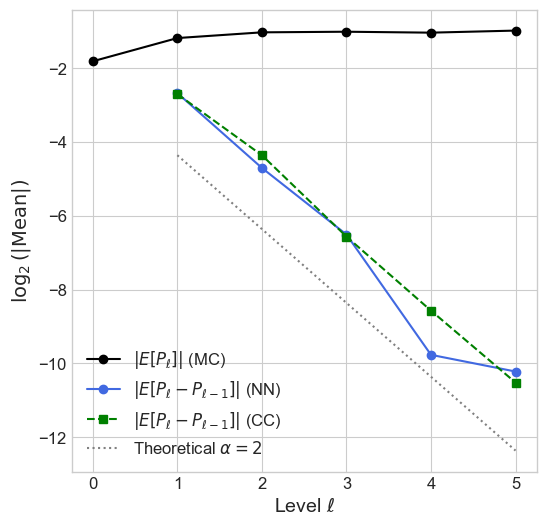

In [223]:
df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_2/mlmc_convergence_dk_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_2/mlmc_convergence_dk_cc.csv")

levels = df_cc['level'].values
ave_mc = df_cc['ave_Pf'].values
ave_mlmc_nn = df_nn['ave_Pf-Pc'].values
ave_mlmc_cc = df_cc['ave_Pf-Pc'].values

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(levels, np.log2(np.abs(ave_mc)), 'ko-', label=r'$|E[P_\ell]|$ (MC)')
ax.plot(levels[1:], np.log2(np.abs(ave_mlmc_nn[1:])), 'o-', label=r'$|E[P_\ell - P_{\ell-1}]|$ (NN)', color='royalblue')
ax.plot(levels[1:], np.log2(np.abs(ave_mlmc_cc[1:])), 's--', label=r'$|E[P_\ell - P_{\ell-1}]|$ (CC)', color='green')

l_theory = levels[1:]
alpha2_theory = np.log2(np.abs(ave_mlmc_cc[2])) - 2.0 * (l_theory - l_theory[0])
ax.plot(l_theory, alpha2_theory, ':', color='grey', label=r'Theoretical $\alpha=2$')

ax.set_xlabel(r'Level $\ell$', fontsize=14)
ax.set_ylabel(r'$\log_2(|\text{Mean}|)$', fontsize=14)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.savefig('report/graphics/dk_err_decay.png', dpi=300,
            bbox_inches='tight')

plt.show()

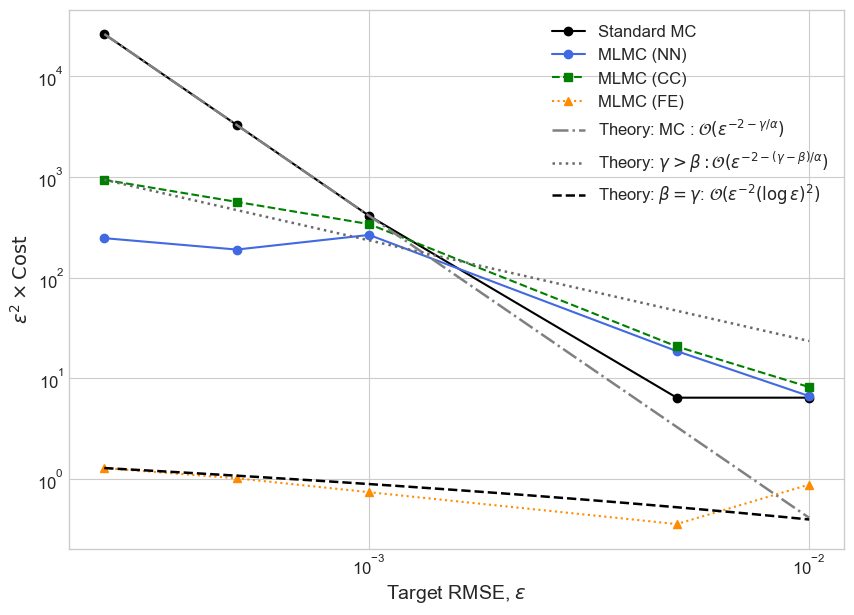

In [251]:
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_fe.csv")

df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_energy_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_energy_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_energy_fe.csv")

Eps_nn = df_fe['eps'].values
mlmc_cost_nn = df_nn['mlmc_cost'].values
std_mc_cost_nn = df_fe['std_mc_cost'].values

Eps_cc = df_cc['eps'].values
mlmc_cost_cc = df_cc['mlmc_cost'].values

Eps_fe = df_fe['eps'].values
mlmc_cost_fe = df_fe['mlmc_cost'].values

# Plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# epsilon range
eps_min = float(np.min([Eps_nn.min(), Eps_cc.min(), Eps_fe.min()]))
eps_max = float(np.max([Eps_nn.max(), Eps_cc.max(), Eps_fe.max()]))
eps_grid = np.logspace(np.log10(eps_min), np.log10(eps_max), 300)

# theoretical complexities
idx_fe_anchor   = int(np.argmin(Eps_fe))
eps_fe_anchor   = Eps_fe[idx_fe_anchor]
normcost_fe_anc = (eps_fe_anchor**2) * mlmc_cost_fe[idx_fe_anchor]

shape_border_bg   = np.log(1.0 / eps_grid)**2
shape_border_anc  = max(np.log(1.0 / eps_fe_anchor)**2, 1e-12)
K_border          = normcost_fe_anc / shape_border_anc

# Use rates measured for energy
alpha_sub = 1.0
beta_sub  = 2.0
gamma_sub = 3.0
p_sub     = (gamma_sub - beta_sub) / alpha_sub
p_mc = gamma_sub / alpha_sub

shape_sub_bg = eps_grid ** (-p_sub)

# 
idx_cc_anchor   = int(np.argmin(Eps_cc))
eps_cc_anchor   = Eps_cc[idx_cc_anchor]
normcost_cc_anc = (eps_cc_anchor**2) * mlmc_cost_cc[idx_cc_anchor]
shape_sub_anc   = max(eps_cc_anchor**(-p_sub), 1e-12)
K_sub           = normcost_cc_anc / shape_sub_anc

shape_mc_bg = eps_grid ** (-p_mc)

idx_mc_anchor   = int(np.argmin(Eps_nn))  # MC ε grid matches NN file
eps_mc_anchor   = Eps_nn[idx_mc_anchor]
normcost_mc_anc = (eps_mc_anchor**2) * std_mc_cost_nn[idx_mc_anchor]
shape_mc_anc    = max(eps_mc_anchor**(-p_mc), 1e-12)
K_mc            = normcost_mc_anc / shape_mc_anc

ax.loglog(Eps_nn, Eps_nn**2 * std_mc_cost_nn, 'ko-', label='Standard MC')
ax.loglog(Eps_nn, Eps_nn**2 * mlmc_cost_nn, 'o-',  label='MLMC (NN)', color='royalblue')
ax.loglog(Eps_cc, Eps_cc**2 * mlmc_cost_cc, 's--', label='MLMC (CC)', color='green')
ax.loglog(Eps_fe, Eps_fe**2 * mlmc_cost_fe, '^:',  label='MLMC (FE)', color='darkorange')
ax.loglog(eps_grid, K_mc * shape_mc_bg, '-.', color='gray', linewidth=1.8,
          label=r'Theory: MC : '
                r'$\mathcal{O}(\varepsilon^{-2 - \gamma / \alpha})$')
ax.loglog(eps_grid, K_sub * shape_sub_bg, ':', color='dimgray', linewidth=1.8,
          label=r'Theory: $\gamma>\beta: \mathcal{O}(\varepsilon^{-2 - (\gamma - \beta) / \alpha})$')
ax.loglog(eps_grid, K_border * shape_border_bg, '--', color='black', linewidth=1.8,
          label=r'Theory: $\beta=\gamma$: $\mathcal{O}(\varepsilon^{-2}(\log \varepsilon)^2)$')


# --- Axes / legend ---
ax.set_xlabel(r'Target RMSE, $\varepsilon$', fontsize=14)
ax.set_ylabel(r'$\varepsilon^2 \times \text{Cost}$', fontsize=14)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(right=Eps_nn.max()*1.2)

plt.savefig('report/graphics/she_costs_energy.png', dpi=300, bbox_inches='tight')
plt.show()


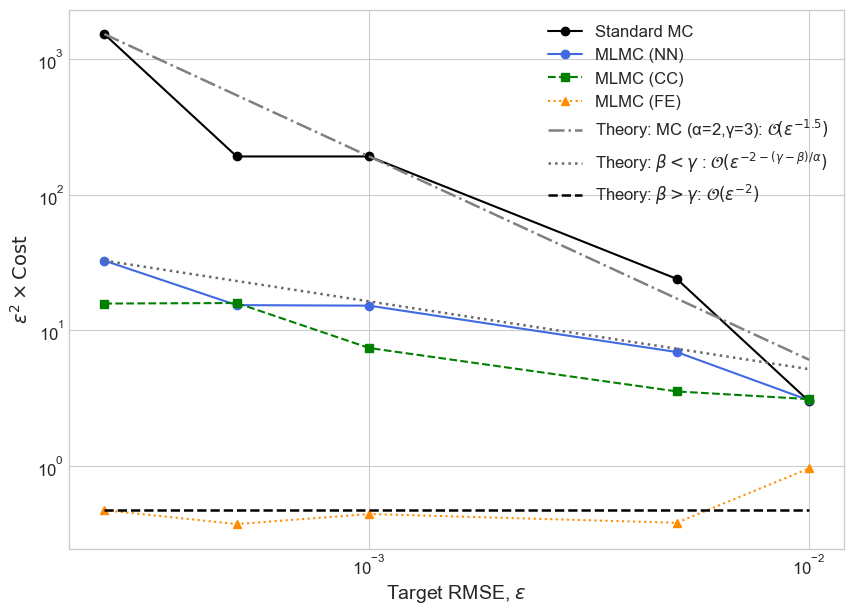

In [254]:
df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_fourier_mode_var.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_fe.csv")

Eps_nn = df_nn['eps'].values
mlmc_cost_nn = df_nn['mlmc_cost'].values
std_mc_cost_nn = df_nn['std_mc_cost'].values

Eps_cc = df_cc['eps'].values
mlmc_cost_cc = df_cc['mlmc_cost'].values

Eps_fe = df_fe['eps'].values
mlmc_cost_fe = df_fe['mlmc_cost'].values

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# ε-grid for theory guides
eps_min = float(np.min([Eps_nn.min(), Eps_cc.min(), Eps_fe.min()]))
eps_max = float(np.max([Eps_nn.max(), Eps_cc.max(), Eps_fe.max()]))
eps_grid = np.logspace(np.log10(eps_min), np.log10(eps_max), 300)

# --- Theory guide: sub-optimal γ>β with α=2, β=2, γ=3 -> p = (γ-β)/α = 0.5 ---
p_sub = 0.5
shape_sub = eps_grid ** (-p_sub)

# Anchor at NN smallest ε
idx_nn_anc = int(np.argmin(Eps_nn))
eps_nn_anc = Eps_nn[idx_nn_anc]
normcost_nn_anc = (eps_nn_anc**2) * mlmc_cost_nn[idx_nn_anc]
K_sub = normcost_nn_anc / max(eps_nn_anc**(-p_sub), 1e-12)

# --- Theory guide: optimal β>γ -> normalised cost ~ constant ---
# Anchor at FE smallest ε
idx_fe_anc = int(np.argmin(Eps_fe))
eps_fe_anc = Eps_fe[idx_fe_anc]
normcost_fe_anc = (eps_fe_anc**2) * mlmc_cost_fe[idx_fe_anc]


# MC theoretical cost
p_mc = 1.5
shape_mc = eps_grid ** (-p_mc)
idx_mc_anc = int(np.argmin(Eps_nn))  # same ε grid as MC curve
eps_mc_anc = Eps_nn[idx_mc_anc]
normcost_mc_anc = (eps_mc_anc**2) * std_mc_cost_nn[idx_mc_anc]
K_mc = normcost_mc_anc / max(eps_mc_anc**(-p_mc), 1e-12)

# Curves
ax.loglog(Eps_nn, Eps_nn**2 * std_mc_cost_nn, 'ko-', label='Standard MC')
ax.loglog(Eps_nn, Eps_nn**2 * mlmc_cost_nn, 'o-',  label='MLMC (NN)', color='royalblue')
ax.loglog(Eps_cc, Eps_cc**2 * mlmc_cost_cc, 's--', label='MLMC (CC)', color='green')
ax.loglog(Eps_fe, Eps_fe**2 * mlmc_cost_fe, '^:',  label='MLMC (FE)', color='darkorange')
ax.loglog(
    eps_grid, K_mc * shape_mc, '-.', color='gray', linewidth=1.8,
    label=rf'Theory: MC (α=2,γ=3): $\mathcal{{O}}\!\left(\varepsilon^{{-{p_mc}}}\right)$'
)
ax.loglog(
    eps_grid, K_sub * shape_sub, ':', color='dimgray', linewidth=1.8,
    label=r'Theory: $\beta<\gamma$ : $\mathcal{O}(\varepsilon^{-2 - (\gamma - \beta) / \alpha})$'
)
ax.loglog(
    eps_grid, np.full_like(eps_grid, normcost_fe_anc), '--', color='black', linewidth=1.8,
    label=r'Theory: $\beta>\gamma$: $\mathcal{O}(\varepsilon^{-2})$'
)


# Labels / legend / limits
ax.set_xlabel(r'Target RMSE, $\varepsilon$', fontsize=14)
ax.set_ylabel(r'$\varepsilon^2 \times \text{Cost}$', fontsize=14)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(right=Eps_nn.max()*1.2)

plt.savefig('report/graphics/she_sq_amp_costs.png', dpi=300, bbox_inches='tight')
plt.show()


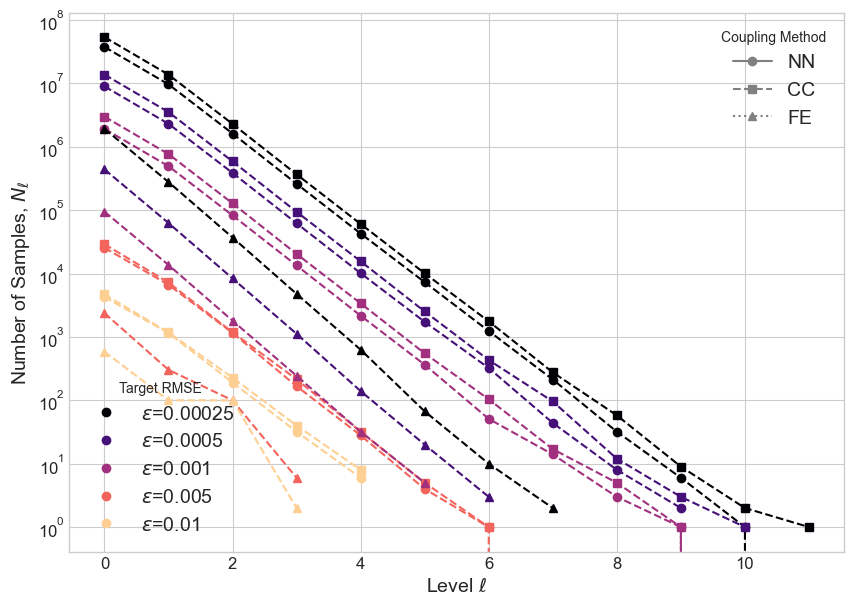

In [228]:
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_energy_fe.csv")

df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_energy_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_energy_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_energy_fe.csv")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

styles = {
    'NN': {'marker': 'o', 'linestyle': '--'},
    'CC': {'marker': 's', 'linestyle': '--'},
    'FE': {'marker': '^', 'linestyle': '--'}
}

data = {
    'NN': df_nn,
    'CC': df_cc,
    'FE': df_fe
}

Eps = df_nn['eps'].values
colors = plt.cm.magma(np.linspace(0, 0.9, len(Eps)))
for method_name, style in styles.items():
    df = data[method_name]
    Nl_cols = [c for c in df.columns if c.startswith("Nl_")]
    Nls = df[Nl_cols].values.astype(float).T

    for i, eps in enumerate(Eps):
        valid_Nls = Nls[:, i][~np.isnan(Nls[:, i])]
        ls = np.arange(len(valid_Nls))
        
        ax.semilogy(ls, valid_Nls, 
                    marker=style['marker'], 
                    linestyle=style['linestyle'], 
                    color=colors[i])

legend_methods = [
    mlines.Line2D([], [], color='grey', marker='o', linestyle='-', label='NN'),
    mlines.Line2D([], [], color='grey', marker='s', linestyle='--', label='CC'),
    mlines.Line2D([], [], color='grey', marker='^', linestyle=':', label='FE')
]
legend_eps = [
    mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None', 
                  label=fr'$\varepsilon$={eps:.3g}') for i, eps in enumerate(Eps)
]
legend1 = ax.legend(handles=legend_methods, title='Coupling Method', loc='upper right', fontsize=14)

ax.add_artist(legend1)
ax.legend(handles=legend_eps, title='Target RMSE', loc='lower left', fontsize=14)

ax.set_xlabel(r'Level $\ell$', fontsize=14)
ax.set_ylabel(r'Number of Samples, $N_\ell$', fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.tick_params(axis='both', which='major', labelsize=12)

plt.savefig('report/graphics/she_energy_nums.png', dpi=300,
            bbox_inches='tight')
plt.show()

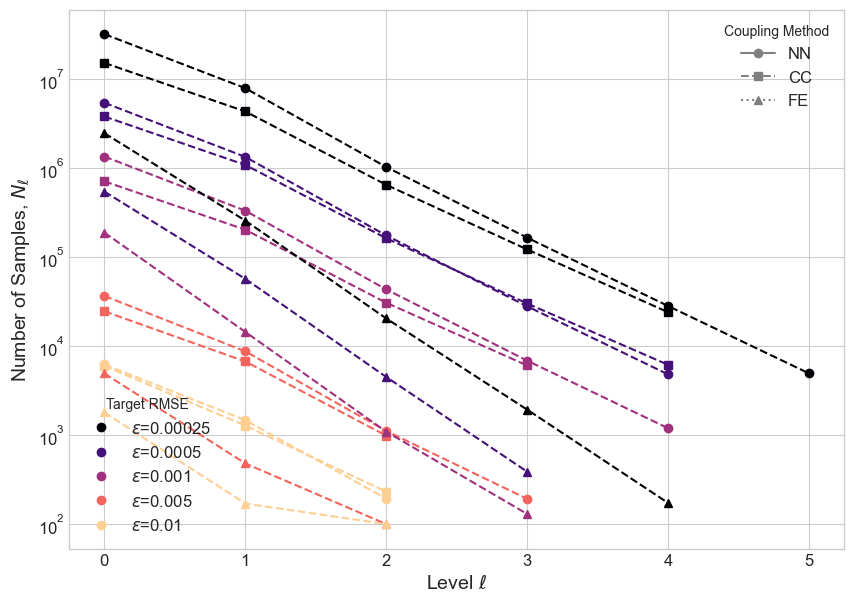

In [229]:
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_fourier_mode_var.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_fe.csv")

df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_fourier_mode_var.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_fe.csv")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

styles = {
    'NN': {'marker': 'o', 'linestyle': '--'},
    'CC': {'marker': 's', 'linestyle': '--'},
    'FE': {'marker': '^', 'linestyle': '--'}
}

data = {
    'NN': df_nn,
    'CC': df_cc,
    'FE': df_fe
}

Eps = df_nn['eps'].values
colors = plt.cm.magma(np.linspace(0, 0.9, len(Eps)))
for method_name, style in styles.items():
    df = data[method_name]
    Nl_cols = [c for c in df.columns if c.startswith("Nl_")]
    Nls = df[Nl_cols].values.astype(float).T

    for i, eps in enumerate(Eps):
        valid_Nls = Nls[:, i][~np.isnan(Nls[:, i])]
        ls = np.arange(len(valid_Nls))
        
        ax.semilogy(ls, valid_Nls, 
                    marker=style['marker'], 
                    linestyle=style['linestyle'], 
                    color=colors[i])

legend_methods = [
    mlines.Line2D([], [], color='grey', marker='o', linestyle='-', label='NN'),
    mlines.Line2D([], [], color='grey', marker='s', linestyle='--', label='CC'),
    mlines.Line2D([], [], color='grey', marker='^', linestyle=':', label='FE')
]
legend_eps = [
    mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None', 
                  label=fr'$\varepsilon$={eps:.3g}') for i, eps in enumerate(Eps)
]
legend1 = ax.legend(handles=legend_methods, title='Coupling Method', loc='upper right', fontsize=12)

ax.add_artist(legend1)
ax.legend(handles=legend_eps, title='Target RMSE', loc='lower left', fontsize=12)

ax.set_xlabel(r'Level $\ell$', fontsize=14)
ax.set_ylabel(r'Number of Samples, $N_\ell$', fontsize=14)
# ax.set_title('MLMC Sample Allocation', fontsize=14, pad=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.tick_params(axis='both', which='major', labelsize=12)

plt.savefig('report/graphics/she_sq_amps_nums.png', dpi=300,
            bbox_inches='tight')
plt.show()

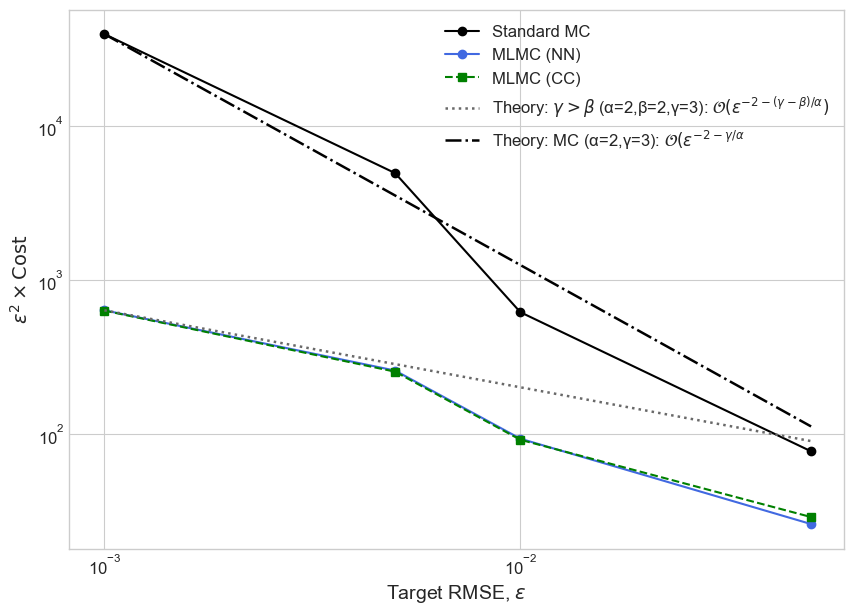

In [239]:
df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_2/mlmc_complexity_dk_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_2/mlmc_complexity_dk_cc.csv")

Eps_nn = df_nn['eps'].values
mlmc_cost_nn = df_nn['mlmc_cost'].values
std_mc_cost_nn = df_nn['std_mc_cost'].values

Eps_cc = df_cc['eps'].values
mlmc_cost_cc = df_cc['mlmc_cost'].values

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

ax.loglog(Eps_nn, Eps_nn**2 * std_mc_cost_nn, 'ko-', label='Standard MC')
ax.loglog(Eps_nn, Eps_nn**2 * mlmc_cost_nn, 'o-',  label='MLMC (NN)', color='royalblue')
ax.loglog(Eps_cc, Eps_cc**2 * mlmc_cost_cc, 's--', label='MLMC (CC)', color='green')

# --- ε-grid for theory guides ---
eps_min = float(np.min([Eps_nn.min(), Eps_cc.min()]))
eps_max = float(np.max([Eps_nn.max(), Eps_cc.max()]))
eps_grid = np.logspace(np.log10(eps_min), np.log10(eps_max), 300)

# ---------- Theory guide: γ > β (sub-optimal) ----------
# Use α=2, β=2, γ=3  -> normalized cost ∝ ε^{-p},  p=(γ-β)/α = 0.5
alpha_sub = 2.0
beta_sub  = 2.0
gamma_sub = 3.0  # set to 2.0 if you truly want the border β=γ case
p_sub     = (gamma_sub - beta_sub) / alpha_sub  # 0.5

shape_sub = eps_grid ** (-p_sub)

# Anchor at NN smallest ε for a clean overlay
idx_nn_anc = int(np.argmin(Eps_nn))
eps_nn_anc = Eps_nn[idx_nn_anc]
normcost_nn_anc = (eps_nn_anc**2) * mlmc_cost_nn[idx_nn_anc]
K_sub = normcost_nn_anc / max(eps_nn_anc**(-p_sub), 1e-12)

ax.loglog(
    eps_grid, K_sub * shape_sub, ':', color='dimgray', linewidth=1.8,
    label=rf'Theory: $\gamma>\beta$ (α=2,β=2,γ={gamma_sub:.0f}): '
          r'$\mathcal{O}(\varepsilon^{-2-(\gamma - \beta) / \alpha})$'
)

# ---------- Theory guide: Standard MC ----------
# Take α=2, γ=3 -> normalized cost exponent p_mc = γ/α = 1.5
alpha_mc = 2.0
gamma_mc = 3.0
p_mc     = gamma_mc / alpha_mc  # 1.5

shape_mc = eps_grid ** (-p_mc)

# Anchor at the NN MC curve (same ε grid)
idx_mc_anc = int(np.argmin(Eps_nn))
eps_mc_anc = Eps_nn[idx_mc_anc]
normcost_mc_anc = (eps_mc_anc**2) * std_mc_cost_nn[idx_mc_anc]
K_mc = normcost_mc_anc / max(eps_mc_anc**(-p_mc), 1e-12)

ax.loglog(
    eps_grid, K_mc * shape_mc, '-.', color='black', linewidth=1.8,
    label=r'Theory: MC (α=2,γ=3): '
          r'$\mathcal{O}(\varepsilon^{-2 - \gamma / \alpha}$'
)

# --- Labels / legend / limits ---
ax.set_xlabel(r'Target RMSE, $\varepsilon$', fontsize=14)
ax.set_ylabel(r'$\varepsilon^2 \times \text{Cost}$', fontsize=14)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(right=Eps_nn.max()*1.2)

plt.savefig('report/graphics/dk_costs.png', dpi=300, bbox_inches='tight')
plt.show()


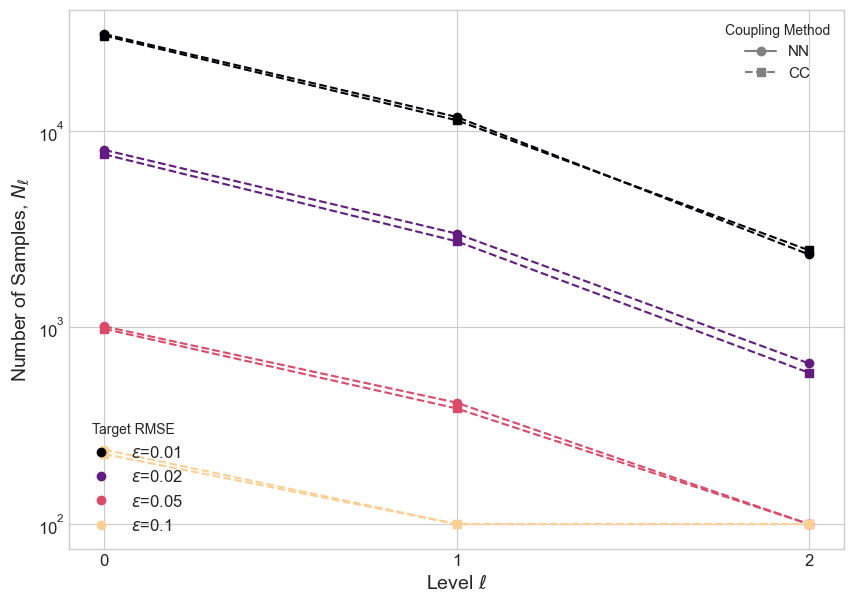

In [231]:
df_nn = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_dk_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs/mlmc_complexity_dk_cc.csv")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

styles = {
    'NN': {'marker': 'o', 'linestyle': '--'},
    'CC': {'marker': 's', 'linestyle': '--'},
}

data = {
    'NN': df_nn,
    'CC': df_cc,
    'FE': df_fe
}

Eps = df_nn['eps'].values
colors = plt.cm.magma(np.linspace(0, 0.9, len(Eps)))
for method_name, style in styles.items():
    df = data[method_name]
    Nl_cols = [c for c in df.columns if c.startswith("Nl_")]
    Nls = df[Nl_cols].values.astype(float).T

    for i, eps in enumerate(Eps):
        valid_Nls = Nls[:, i][~np.isnan(Nls[:, i])]
        ls = np.arange(len(valid_Nls))
        
        ax.semilogy(ls, valid_Nls, 
                    marker=style['marker'], 
                    linestyle=style['linestyle'], 
                    color=colors[i])

legend_methods = [
    mlines.Line2D([], [], color='grey', marker='o', linestyle='-', label='NN'),
    mlines.Line2D([], [], color='grey', marker='s', linestyle='--', label='CC'),
]
legend_eps = [
    mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None', 
                  label=fr'$\varepsilon$={eps:.3g}') for i, eps in enumerate(Eps)
]
legend1 = ax.legend(handles=legend_methods, title='Coupling Method', loc='upper right', fontsize=11)

ax.add_artist(legend1)
ax.legend(handles=legend_eps, title='Target RMSE', loc='lower left', fontsize=12)

ax.set_xlabel(r'Level $\ell$', fontsize=14)
ax.set_ylabel(r'Number of Samples, $N_\ell$', fontsize=14)
# ax.set_title('MLMC Sample Allocation', fontsize=14, pad=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.tick_params(axis='both', which='major', labelsize=12)

plt.savefig('report/graphics/dk_nums.png', dpi=300,
            bbox_inches='tight')
plt.show()

In [256]:
import numpy as np
import pandas as pd

# --- Load your three runs ---
df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_fourier_mode_var.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_fourier_mode_var_fe.csv")

# --- Choose MC baseline (use FE if you believe its MC estimates are best) ---
mc_source = df_fe      # or df_nn if you prefer
base = mc_source[['eps', 'std_mc_cost']].rename(columns={'std_mc_cost': 'mc_cost'})

# --- Bring in MLMC costs and align on common eps ---
nn = df_nn[['eps', 'mlmc_cost']].rename(columns={'mlmc_cost': 'mlmc_nn'})
cc = df_cc[['eps', 'mlmc_cost']].rename(columns={'mlmc_cost': 'mlmc_cc'})
fe = df_fe[['eps', 'mlmc_cost']].rename(columns={'mlmc_cost': 'mlmc_fe'})

df = base.merge(nn, on='eps', how='inner').merge(cc, on='eps', how='inner').merge(fe, on='eps', how='inner')

# --- Compute speed-ups (use normalised costs to match your figures) ---
eps = df['eps'].to_numpy()
mc_norm  = eps**2 * df['mc_cost'].to_numpy()
nn_norm  = eps**2 * df['mlmc_nn'].to_numpy()
cc_norm  = eps**2 * df['mlmc_cc'].to_numpy()
fe_norm  = eps**2 * df['mlmc_fe'].to_numpy()

speedup_nn = mc_norm / nn_norm
speedup_cc = mc_norm / cc_norm
speedup_fe = mc_norm / fe_norm

# --- Pretty print per-ε table ---
out = pd.DataFrame({
    'eps': eps,
    'speedup_nn': speedup_nn,
    'speedup_cc': speedup_cc,
    'speedup_fe': speedup_fe
}).sort_values('eps', ascending=False)

print("\nSpeed-up = (MC cost) / (MLMC cost) at each ε (using FE-implied MC costs):")
print(out.to_string(index=False, formatters={
    'eps': lambda x: f"{x:.3g}",
    'speedup_nn': lambda x: f"{x:.1f}x",
    'speedup_cc': lambda x: f"{x:.1f}x",
    'speedup_fe': lambda x: f"{x:.1f}x",
}))

# --- Optional summary stats (min, max, geometric mean) ---
def stats(arr):
    a = arr[np.isfinite(arr)]
    gmean = np.exp(np.mean(np.log(a)))
    return a.min(), np.median(a), gmean, a.max()

for name, arr in [('NN', speedup_nn), ('CC', speedup_cc), ('FE', speedup_fe)]:
    mn, md, gm, mx = stats(arr)
    print(f"{name:>2} speed-up: min {mn:.1f}x | median {md:.1f}x | geom-mean {gm:.1f}x | max {mx:.1f}x")



Speed-up = (MC cost) / (MLMC cost) at each ε (using FE-implied MC costs):
    eps speedup_nn speedup_cc speedup_fe
   0.01       1.0x       0.9x       3.0x
  0.005       0.4x       0.8x       7.7x
  0.001       1.5x       3.2x      53.1x
 0.0005       1.5x       1.5x      62.9x
0.00025       5.7x      11.9x     397.7x
NN speed-up: min 0.4x | median 1.5x | geom-mean 1.4x | max 5.7x
CC speed-up: min 0.8x | median 1.5x | geom-mean 2.1x | max 11.9x
FE speed-up: min 3.0x | median 53.1x | geom-mean 31.5x | max 397.7x


In [257]:
import numpy as np
import pandas as pd

# --- Load your three runs ---
df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_energy_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_energy_cc.csv")
df_fe = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_1/mlmc_complexity_stoch_heat_eqn_energy_fe.csv")

# --- Choose MC baseline (use FE if you believe its MC estimates are best) ---
mc_source = df_fe      # or df_nn if you prefer
base = mc_source[['eps', 'std_mc_cost']].rename(columns={'std_mc_cost': 'mc_cost'})

# --- Bring in MLMC costs and align on common eps ---
nn = df_nn[['eps', 'mlmc_cost']].rename(columns={'mlmc_cost': 'mlmc_nn'})
cc = df_cc[['eps', 'mlmc_cost']].rename(columns={'mlmc_cost': 'mlmc_cc'})
fe = df_fe[['eps', 'mlmc_cost']].rename(columns={'mlmc_cost': 'mlmc_fe'})

df = base.merge(nn, on='eps', how='inner').merge(cc, on='eps', how='inner').merge(fe, on='eps', how='inner')

# --- Compute speed-ups (use normalised costs to match your figures) ---
eps = df['eps'].to_numpy()
mc_norm  = eps**2 * df['mc_cost'].to_numpy()
nn_norm  = eps**2 * df['mlmc_nn'].to_numpy()
cc_norm  = eps**2 * df['mlmc_cc'].to_numpy()
fe_norm  = eps**2 * df['mlmc_fe'].to_numpy()

speedup_nn = mc_norm / nn_norm
speedup_cc = mc_norm / cc_norm
speedup_fe = mc_norm / fe_norm

# --- Pretty print per-ε table ---
out = pd.DataFrame({
    'eps': eps,
    'speedup_nn': speedup_nn,
    'speedup_cc': speedup_cc,
    'speedup_fe': speedup_fe
}).sort_values('eps', ascending=False)

print("\nSpeed-up = (MC cost) / (MLMC cost) at each ε (using FE-implied MC costs):")
print(out.to_string(index=False, formatters={
    'eps': lambda x: f"{x:.3g}",
    'speedup_nn': lambda x: f"{x:.1f}x",
    'speedup_cc': lambda x: f"{x:.1f}x",
    'speedup_fe': lambda x: f"{x:.1f}x",
}))

# --- Optional summary stats (min, max, geometric mean) ---
def stats(arr):
    a = arr[np.isfinite(arr)]
    gmean = np.exp(np.mean(np.log(a)))
    return a.min(), np.median(a), gmean, a.max()

for name, arr in [('NN', speedup_nn), ('CC', speedup_cc), ('FE', speedup_fe)]:
    mn, md, gm, mx = stats(arr)
    print(f"{name:>2} speed-up: min {mn:.1f}x | median {md:.1f}x | geom-mean {gm:.1f}x | max {mx:.1f}x")



Speed-up = (MC cost) / (MLMC cost) at each ε (using FE-implied MC costs):
    eps speedup_nn speedup_cc speedup_fe
   0.01       1.0x       0.8x       7.3x
  0.005       0.3x       0.3x      18.0x
  0.001       1.5x       1.2x     556.5x
 0.0005      17.3x       5.8x    3237.4x
0.00025     106.6x      28.0x   20494.0x
NN speed-up: min 0.3x | median 1.5x | geom-mean 3.9x | max 106.6x
CC speed-up: min 0.3x | median 1.2x | geom-mean 2.2x | max 28.0x
FE speed-up: min 7.3x | median 556.5x | geom-mean 344.5x | max 20494.0x


In [259]:
import numpy as np
import pandas as pd

# --- Load your three runs ---
df_nn = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_2/mlmc_complexity_dk_nn.csv")
df_cc = pd.read_csv("mlmc_cpp/outputs_mimic/outputs_2/mlmc_complexity_dk_cc.csv")

# --- Choose MC baseline (use FE if you believe its MC estimates are best) ---
mc_source = df_nn      # or df_nn if you prefer
base = mc_source[['eps', 'std_mc_cost']].rename(columns={'std_mc_cost': 'mc_cost'})

# --- Bring in MLMC costs and align on common eps ---
nn = df_nn[['eps', 'mlmc_cost']].rename(columns={'mlmc_cost': 'mlmc_nn'})
cc = df_cc[['eps', 'mlmc_cost']].rename(columns={'mlmc_cost': 'mlmc_cc'})

df = base.merge(nn, on='eps', how='inner').merge(cc, on='eps', how='inner')

# --- Compute speed-ups (use normalised costs to match your figures) ---
eps = df['eps'].to_numpy()
mc_norm  = eps**2 * df['mc_cost'].to_numpy()
nn_norm  = eps**2 * df['mlmc_nn'].to_numpy()
cc_norm  = eps**2 * df['mlmc_cc'].to_numpy()

speedup_nn = mc_norm / nn_norm
speedup_cc = mc_norm / cc_norm

# --- Pretty print per-ε table ---
out = pd.DataFrame({
    'eps': eps,
    'speedup_nn': speedup_nn,
    'speedup_cc': speedup_cc
}).sort_values('eps', ascending=False)

print("\nSpeed-up = (MC cost) / (MLMC cost) at each ε (using FE-implied MC costs):")
print(out.to_string(index=False, formatters={
    'eps': lambda x: f"{x:.3g}",
    'speedup_nn': lambda x: f"{x:.1f}x",
    'speedup_cc': lambda x: f"{x:.1f}x"
}))

# --- Optional summary stats (min, max, geometric mean) ---
def stats(arr):
    a = arr[np.isfinite(arr)]
    gmean = np.exp(np.mean(np.log(a)))
    return a.min(), np.median(a), gmean, a.max()

for name, arr in [('NN', speedup_nn), ('CC', speedup_cc)]:
    mn, md, gm, mx = stats(arr)
    print(f"{name:>2} speed-up: min {mn:.1f}x | median {md:.1f}x | geom-mean {gm:.1f}x | max {mx:.1f}x")



Speed-up = (MC cost) / (MLMC cost) at each ε (using FE-implied MC costs):
  eps speedup_nn speedup_cc
 0.05       3.0x       2.7x
 0.01       6.6x       6.7x
0.005      19.2x      19.5x
0.001      62.2x      62.5x
NN speed-up: min 3.0x | median 12.9x | geom-mean 12.4x | max 62.2x
CC speed-up: min 2.7x | median 13.1x | geom-mean 12.2x | max 62.5x
